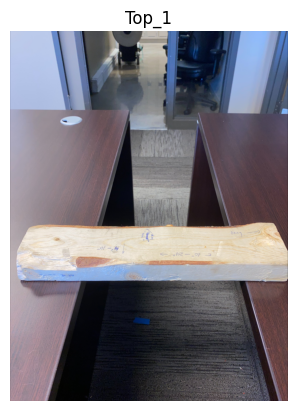

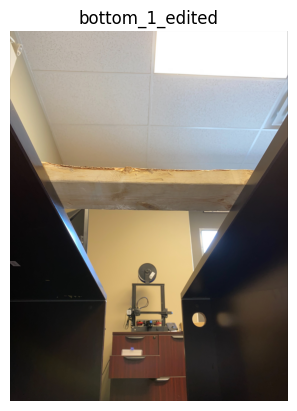

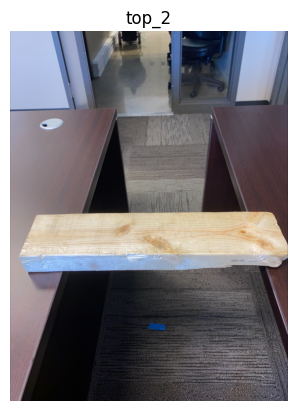

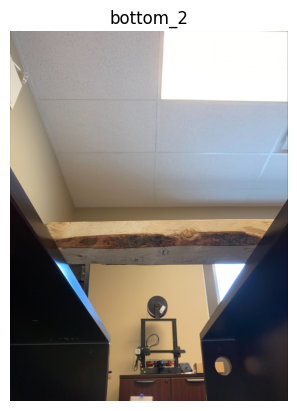

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

top_1 = cv2.imread('../images/top_1.jpeg')
bottom_1 = cv2.imread('../images/bottom_1_edited.jpeg')
top_2 = cv2.imread('../images/top_2.jpeg')
bottom_2 = cv2.imread('../images/bottom_2.jpeg')

plt.imshow(cv2.cvtColor(top_1,cv2.COLOR_BGR2RGB))
plt.title('Top_1')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(bottom_1,cv2.COLOR_BGR2RGB))
plt.title('bottom_1')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(top_2,cv2.COLOR_BGR2RGB))
plt.title('top_2')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(bottom_2,cv2.COLOR_BGR2RGB))
plt.title('bottom_2')
plt.axis('off')
plt.show()

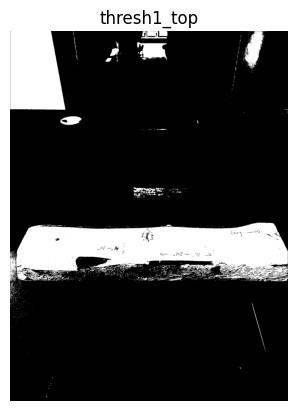

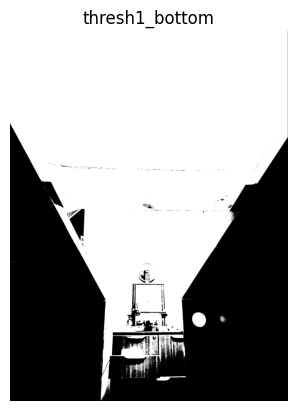

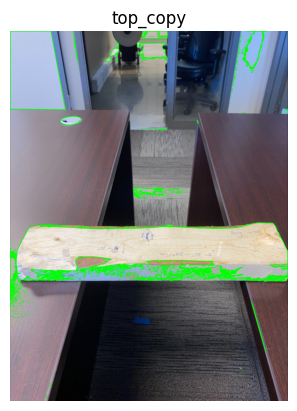

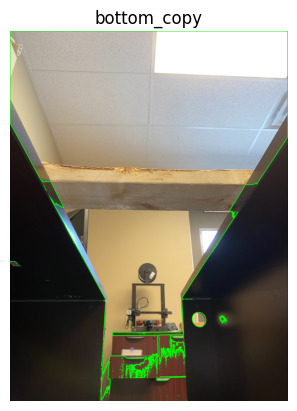

In [63]:
gray_top_1 = cv2.cvtColor(top_1, cv2.COLOR_BGR2GRAY)
ret1,thresh1_top = cv2.threshold(gray_top_1,180,255,cv2.THRESH_BINARY)

gray_bottom_1 = cv2.cvtColor(bottom_1, cv2.COLOR_BGR2GRAY)
ret1,thresh1_bottom = cv2.threshold(gray_bottom_1,75,255,cv2.THRESH_BINARY)


plt.imshow(cv2.cvtColor(thresh1_top,cv2.COLOR_BGR2RGB))
plt.title('thresh1_top')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(thresh1_bottom,cv2.COLOR_BGR2RGB))
plt.title('thresh1_bottom')
plt.axis('off')
plt.show()

contours1, __ = cv2.findContours(thresh1_top, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #RETR_EXTERNAL takes only the outermost contours of the contour hierarchy
contours2, __ = cv2.findContours(thresh1_bottom, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #RETR_EXTERNAL takes only the outermost contours of the contour hierarchy

top_copy = top_1.copy()
bottom_copy = bottom_1.copy()
cv2.drawContours(top_copy, contours1, -1, (0,255,0), 3)
cv2.drawContours(bottom_copy, contours2, -1, (0,255,0), 3)

plt.imshow(cv2.cvtColor(top_copy,cv2.COLOR_BGR2RGB))
plt.title('top_copy')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(bottom_copy,cv2.COLOR_BGR2RGB))
plt.title('bottom_copy')
plt.axis('off')
plt.show()

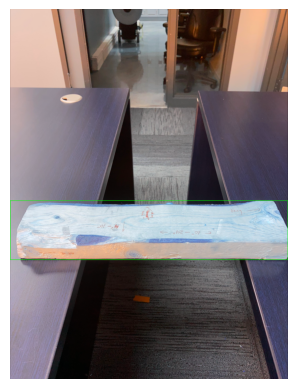

In [64]:
img_copy = top_1.copy()

largest = max(contours, key=cv2.contourArea)

x,y,w,h = cv2.boundingRect(largest)

cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),2)
#params are (src, top-left vertex, bottom-right vertex, color, thickness)

plt.axis('off')
plt.imshow(img_copy)
plt.show()

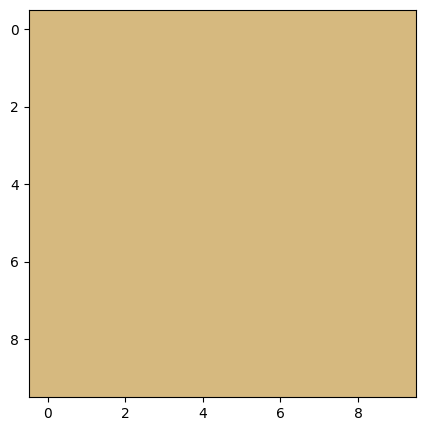

In [65]:
#rgba(190,164,114,255)

b = np.ndarray((10, 10), np.uint8)
b.fill(127)

g = np.ndarray((10, 10), np.uint8)
g.fill(185)

r = np.ndarray((10, 10), np.uint8)
r.fill(214)

template = cv2.merge((b,g,r))

plt.figure(figsize=(5,10))
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.show()

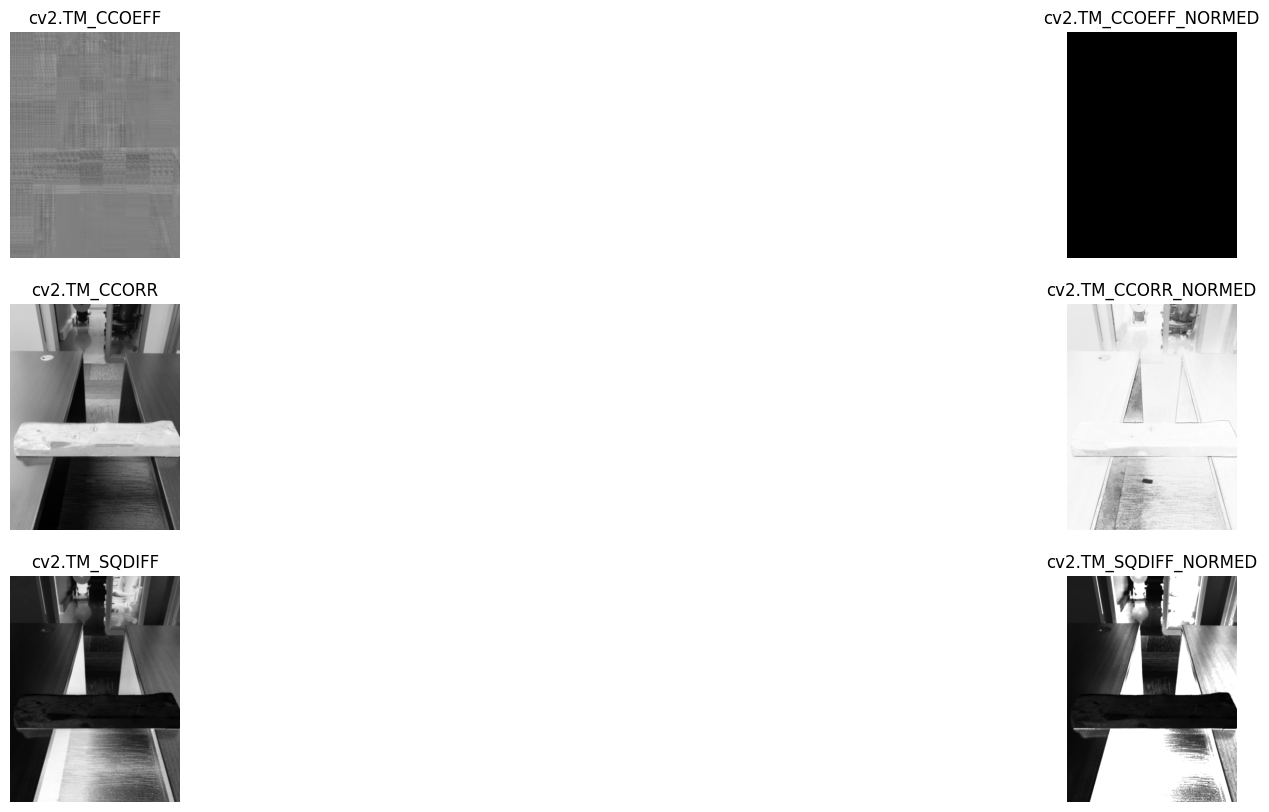

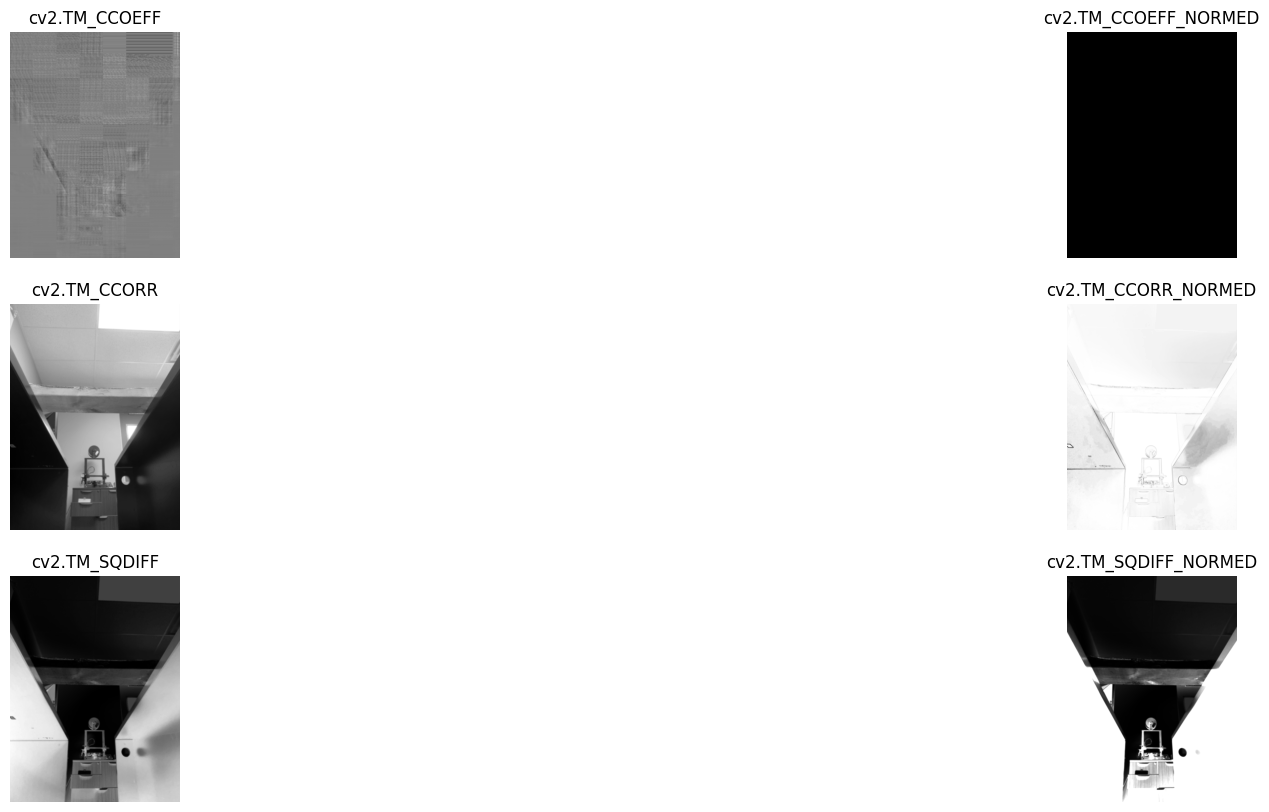

In [66]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

plt.figure(figsize=(25,10))

for i,meth in enumerate(methods):
    method = eval(meth)
    img = top_1.copy()
    res = cv2.matchTemplate(img,template,method)

    plt.subplot(3,2,i+1),plt.imshow(res,cmap = 'gray')
    plt.axis('off')
    plt.title(meth), plt.xticks([]), plt.yticks([])

plt.show()

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

plt.figure(figsize=(25,10))

for i,meth in enumerate(methods):
    method = eval(meth)
    img = bottom_1.copy()
    res = cv2.matchTemplate(img,template,method)

    plt.subplot(3,2,i+1),plt.imshow(res,cmap = 'gray')
    plt.axis('off')
    plt.title(meth), plt.xticks([]), plt.yticks([])

plt.show()

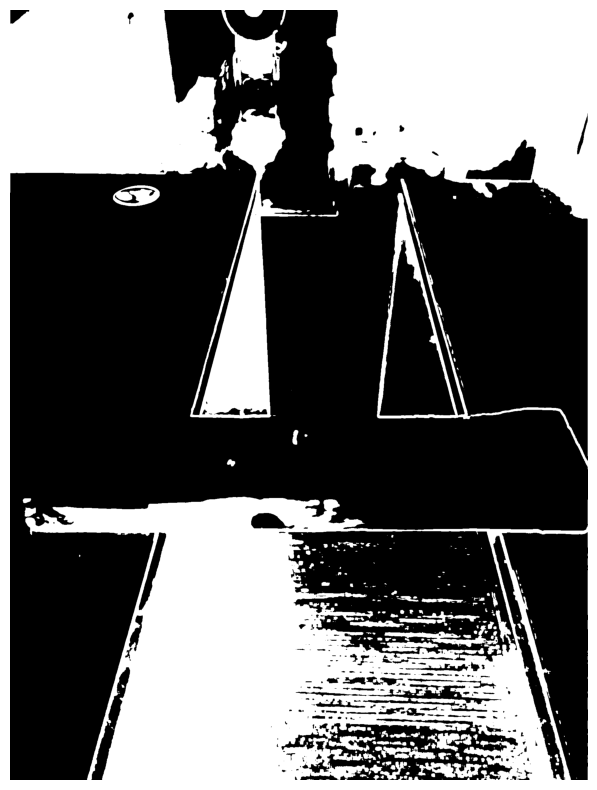

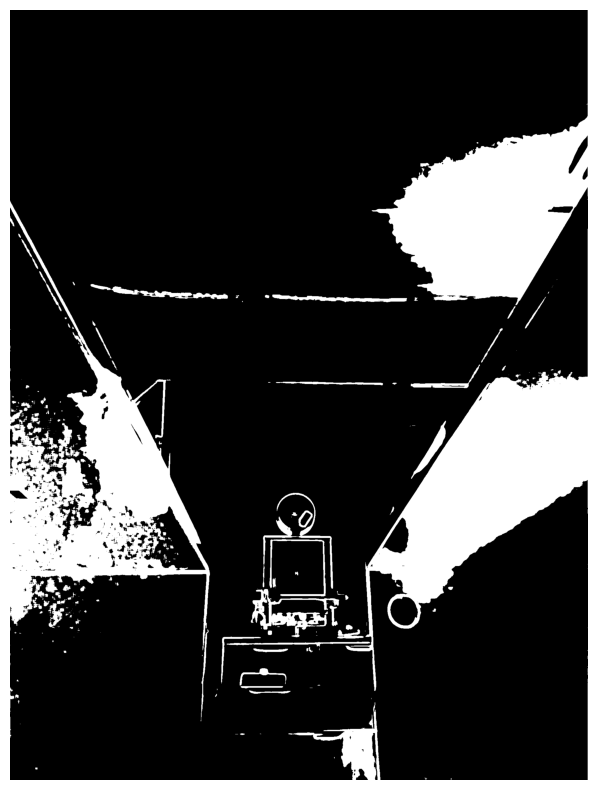

"img_copy = profile_1.copy()\n\ncontours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)\ncv2.drawContours(img_copy, contours, -1, (0,255,0), 3)\n\nplt.figure(figsize=(10,10))\nplt.axis('off')\nplt.imshow(img_copy)\nplt.show()\n#thresh_top = cv2.adaptiveThreshold(gray_top,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,31,2)\n#thresh_bottom = cv2.adaptiveThreshold(gray_bottom,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,31,2)\n\nthresh_top = cv2.threshold(gray_top,175,255,cv2.THRESH_BINARY_INV)[1]\nthresh_bottom = cv2.threshold(gray_bottom,175,255,cv2.THRESH_BINARY_INV)[1]\nplt.figure(figsize=(10,10))\nplt.imshow(thresh_top, 'gray',vmin=0,vmax=255)\nplt.axis('off')\nplt.show()\n\nplt.figure(figsize=(10,10))\nplt.imshow(thresh_bottom, 'gray',vmin=0,vmax=255)\nplt.axis('off')\nplt.show()"

In [67]:
top = cv2.matchTemplate(top_1,template,cv2.TM_CCORR_NORMED)
top = cv2.normalize(top, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
bottom = cv2.matchTemplate(bottom_1,template,cv2.TM_CCORR_NORMED)
bottom = cv2.normalize(bottom, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)

ret2,thresh_top = cv2.threshold(top,235,255,cv2.THRESH_BINARY_INV)
ret2,thresh_bottom = cv2.threshold(bottom,235,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.imshow(thresh_top,cmap = 'gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(thresh_bottom,cmap = 'gray')
plt.axis('off')
plt.show()

"""img_copy = profile_1.copy()

contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_copy, contours, -1, (0,255,0), 3)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_copy)
plt.show()
#thresh_top = cv2.adaptiveThreshold(gray_top,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,31,2)
#thresh_bottom = cv2.adaptiveThreshold(gray_bottom,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,31,2)

thresh_top = cv2.threshold(gray_top,175,255,cv2.THRESH_BINARY_INV)[1]
thresh_bottom = cv2.threshold(gray_bottom,175,255,cv2.THRESH_BINARY_INV)[1]
plt.figure(figsize=(10,10))
plt.imshow(thresh_top, 'gray',vmin=0,vmax=255)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(thresh_bottom, 'gray',vmin=0,vmax=255)
plt.axis('off')
plt.show()"""

There is just not enough variation between the background of the board and the foreground. To speed up this process, we can assume that the background will be darker, so I will just edit the photos accordingly

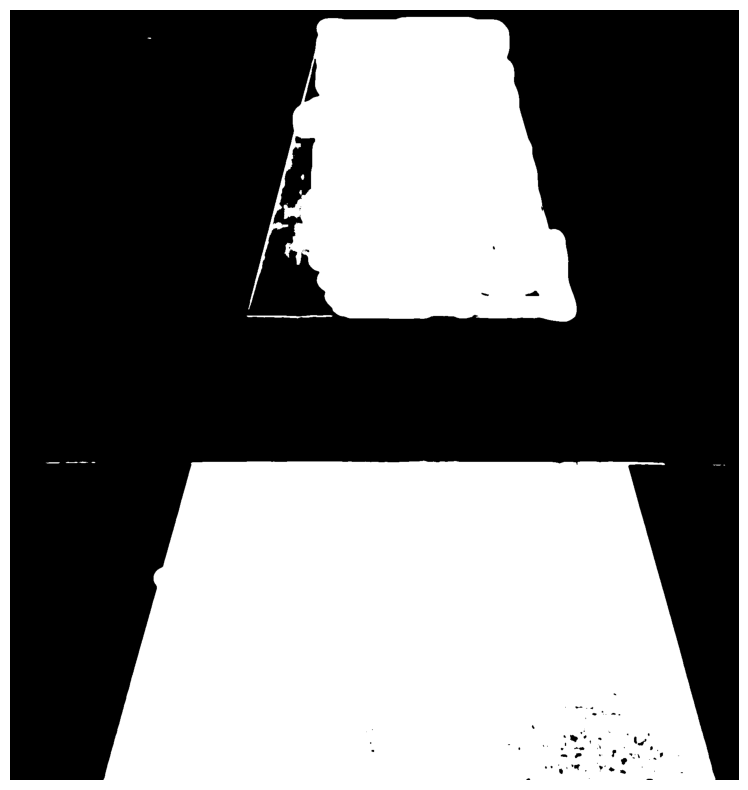

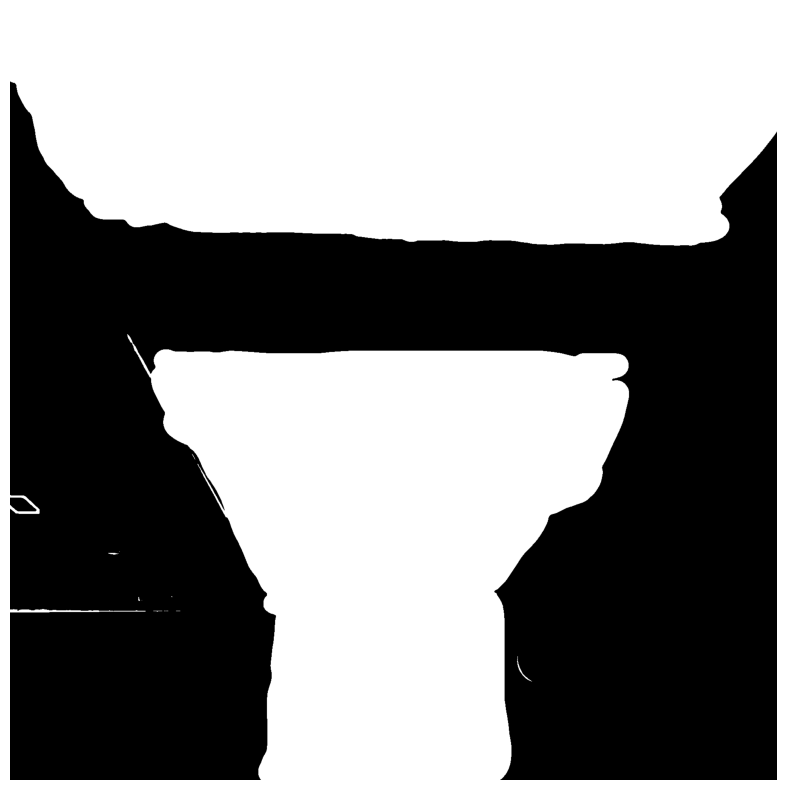

In [68]:
top_1 = cv2.imread('../images/top_1_edited.jpeg')
bottom_1 = cv2.imread('../images/bottom_1_edited.jpeg')

top = cv2.matchTemplate(top_1,template,cv2.TM_CCORR_NORMED)
top = cv2.normalize(top, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
bottom = cv2.matchTemplate(bottom_1,template,cv2.TM_CCORR_NORMED)
bottom = cv2.normalize(bottom, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)

ret2,thresh_top = cv2.threshold(top,200,255,cv2.THRESH_BINARY_INV)
ret2,thresh_bottom = cv2.threshold(bottom,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.imshow(thresh_top,cmap = 'gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(thresh_bottom,cmap = 'gray')
plt.axis('off')
plt.show()

Still not working. I think I will try a new method called background subtracting.

In [69]:
backSub = cv2.createBackgroundSubtractorMOG2()

